In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\uphaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
df1 = pd.read_excel('default of credit card clients.xls')

In [22]:
x = df1.iloc[0,:]
df1.columns = x

In [23]:
df1.drop(0,inplace = True)

In [24]:
df1.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,30000,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [26]:
df1.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [26]:
#sex,education,marriage will be object type only

In [27]:
df1_cat = df1[['SEX','EDUCATION','MARRIAGE','default payment next month']]
df1.drop(['SEX','EDUCATION','MARRIAGE','default payment next month'],1,inplace = True)


In [28]:
df1= df1.astype('int32')
df1_final = pd.concat([df1,df1_cat],1)
df1_final.rename(columns ={'default payment next month':'default'},inplace = True)

In [35]:
df = df1_final.copy()

## EDA

In [34]:
def count_bar(x,target):
    fig,ax = plt.subplots(1,2,figsize = (15,5))
    sns.countplot(target,ax=ax[0])
    ax[0].set_title('Count of the categorical variable')
    sns.barplot(target,x,ax=ax[1])
    ax[1].set_title('Average of the each categorical')
    plt.show()
    
def dist(x,target):
    plt.figure(figsize=(15,8))
    sns.distplot(x[target == 1],color = 'r')
    sns.distplot(x[target == 0],color = 'b')
    plt.title('Distribution plot of target variable')
    plt.legend(('1','0'))
    plt.show()
    

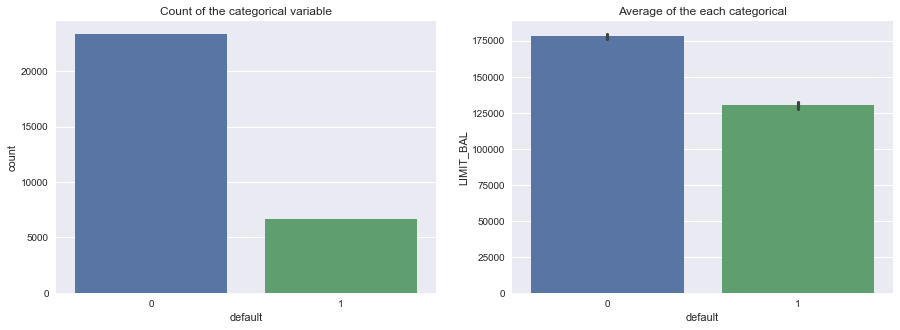

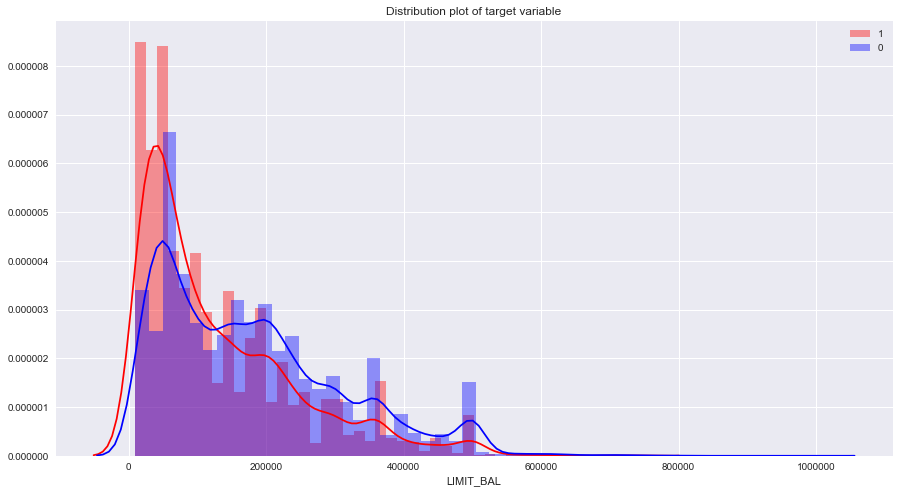

In [37]:
plt.style.use('seaborn')
count_bar(df.LIMIT_BAL,df.default)
dist(df.LIMIT_BAL,df.default)

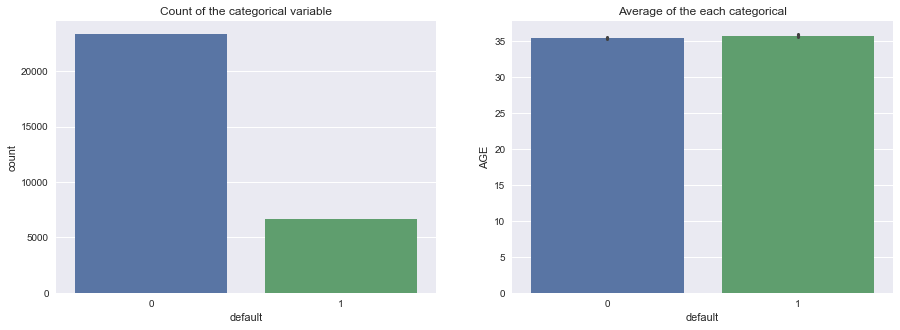

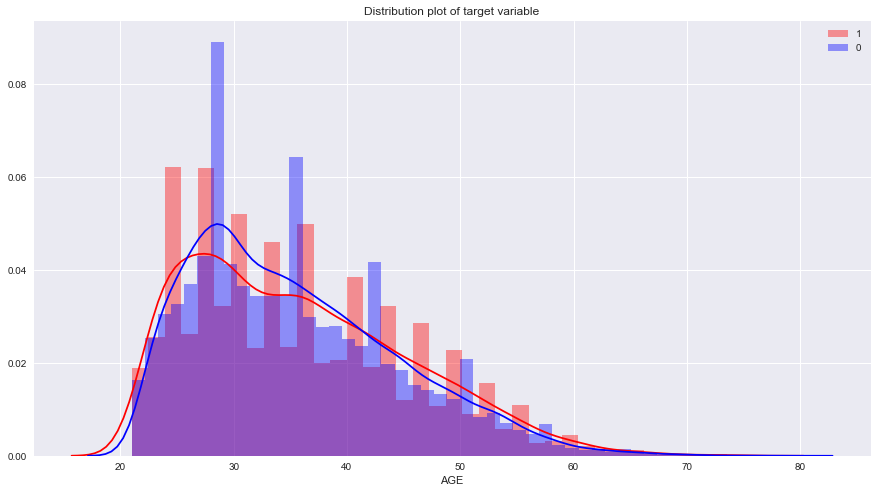

In [38]:
count_bar(df.AGE,df.default)
dist(df.AGE,df.default)

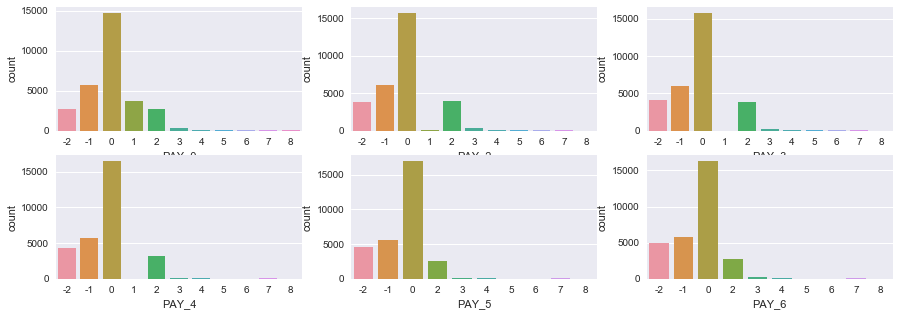

In [39]:
fig,ax = plt.subplots(2,3,figsize= (15,5))
sns.countplot(df.PAY_0,ax=ax[0][0])
sns.countplot(df.PAY_2,ax=ax[0][1])
sns.countplot(df.PAY_3,ax=ax[0][2])
sns.countplot(df.PAY_4,ax=ax[1][0])
sns.countplot(df.PAY_5,ax=ax[1][1])
sns.countplot(df.PAY_6,ax=ax[1][2])
plt.show()

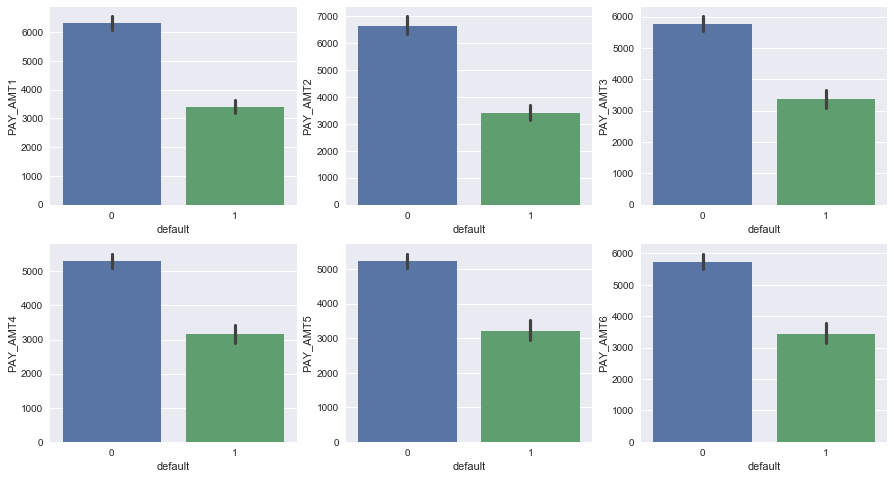

In [40]:
cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

fig, ax = plt.subplots(2, 3, figsize=(15,8))
ax = ax.flatten()
for i in range(len(cols)):
    sns.barplot(df.default,df[cols[i]],ax=ax[i])
    
plt.show()

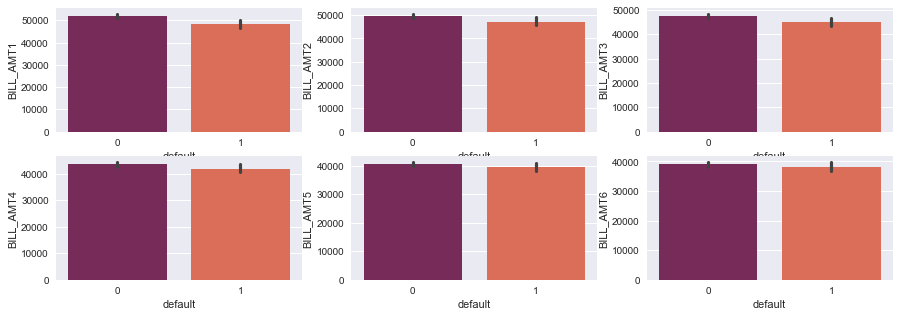

In [41]:
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
fig,ax = plt.subplots(2,3,figsize=(15,5))
ax= ax.flatten()
for x in range(len(cols)):
    
    sns.barplot(df.default,df[cols[x]],palette = 'rocket',ax= ax[x])
plt.show()

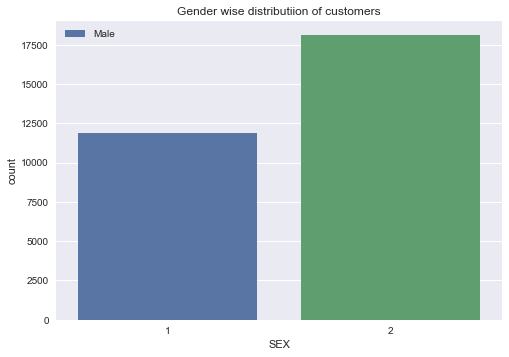

In [43]:
sns.countplot(df.SEX)
plt.legend(('Male','Female'))
plt.title('Gender wise distributiion of customers')
plt.show()

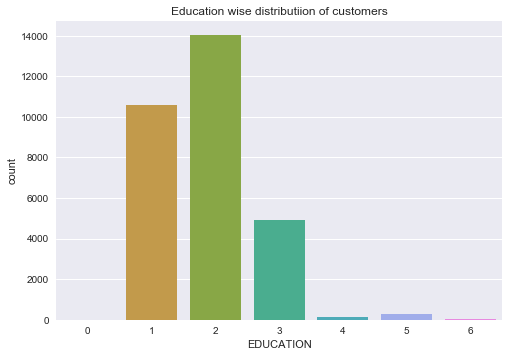

In [44]:
sns.countplot(df.EDUCATION)
plt.title('Education wise distributiion of customers')
plt.show()

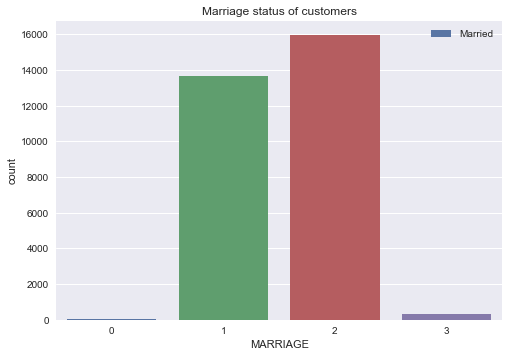

In [45]:
sns.countplot(df.MARRIAGE)
plt.legend(('Married','Single'))
plt.title('Marriage status of customers')
plt.show()

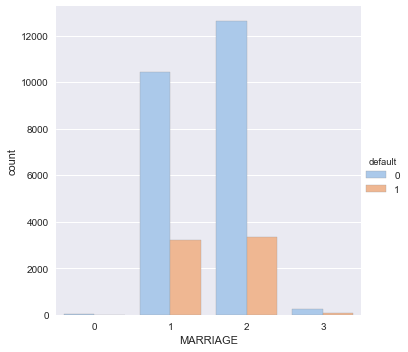

In [46]:
sns.catplot(x="MARRIAGE", hue="default", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

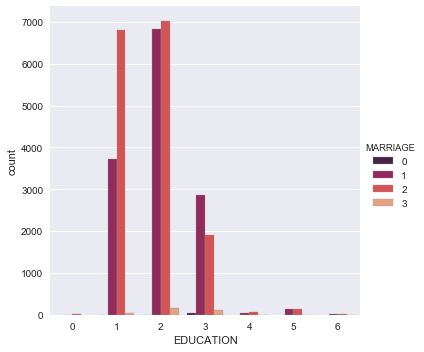

In [47]:
sns.catplot(x="EDUCATION", hue="MARRIAGE", kind="count",
            palette="rocket", edgecolor=".6",
            data=df)

In [48]:
df[['EDUCATION','MARRIAGE','SEX']].describe()

,EDUCATION,MARRIAGE,SEX
count,30000,30000,30000
unique,7,4,2
top,2,2,2
freq,14030,15964,18112


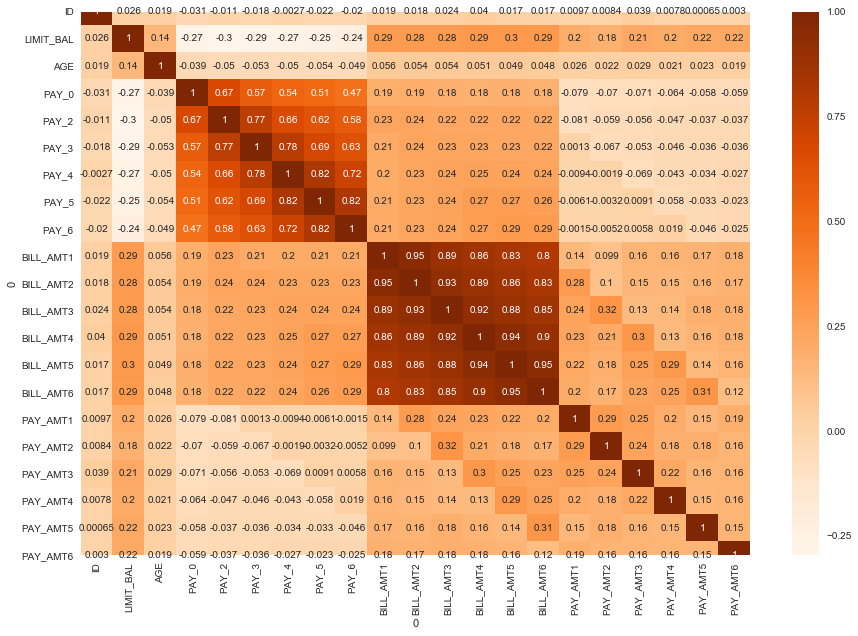

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap = 'Oranges',annot = True)
plt.show()

In [50]:
df_bill = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]

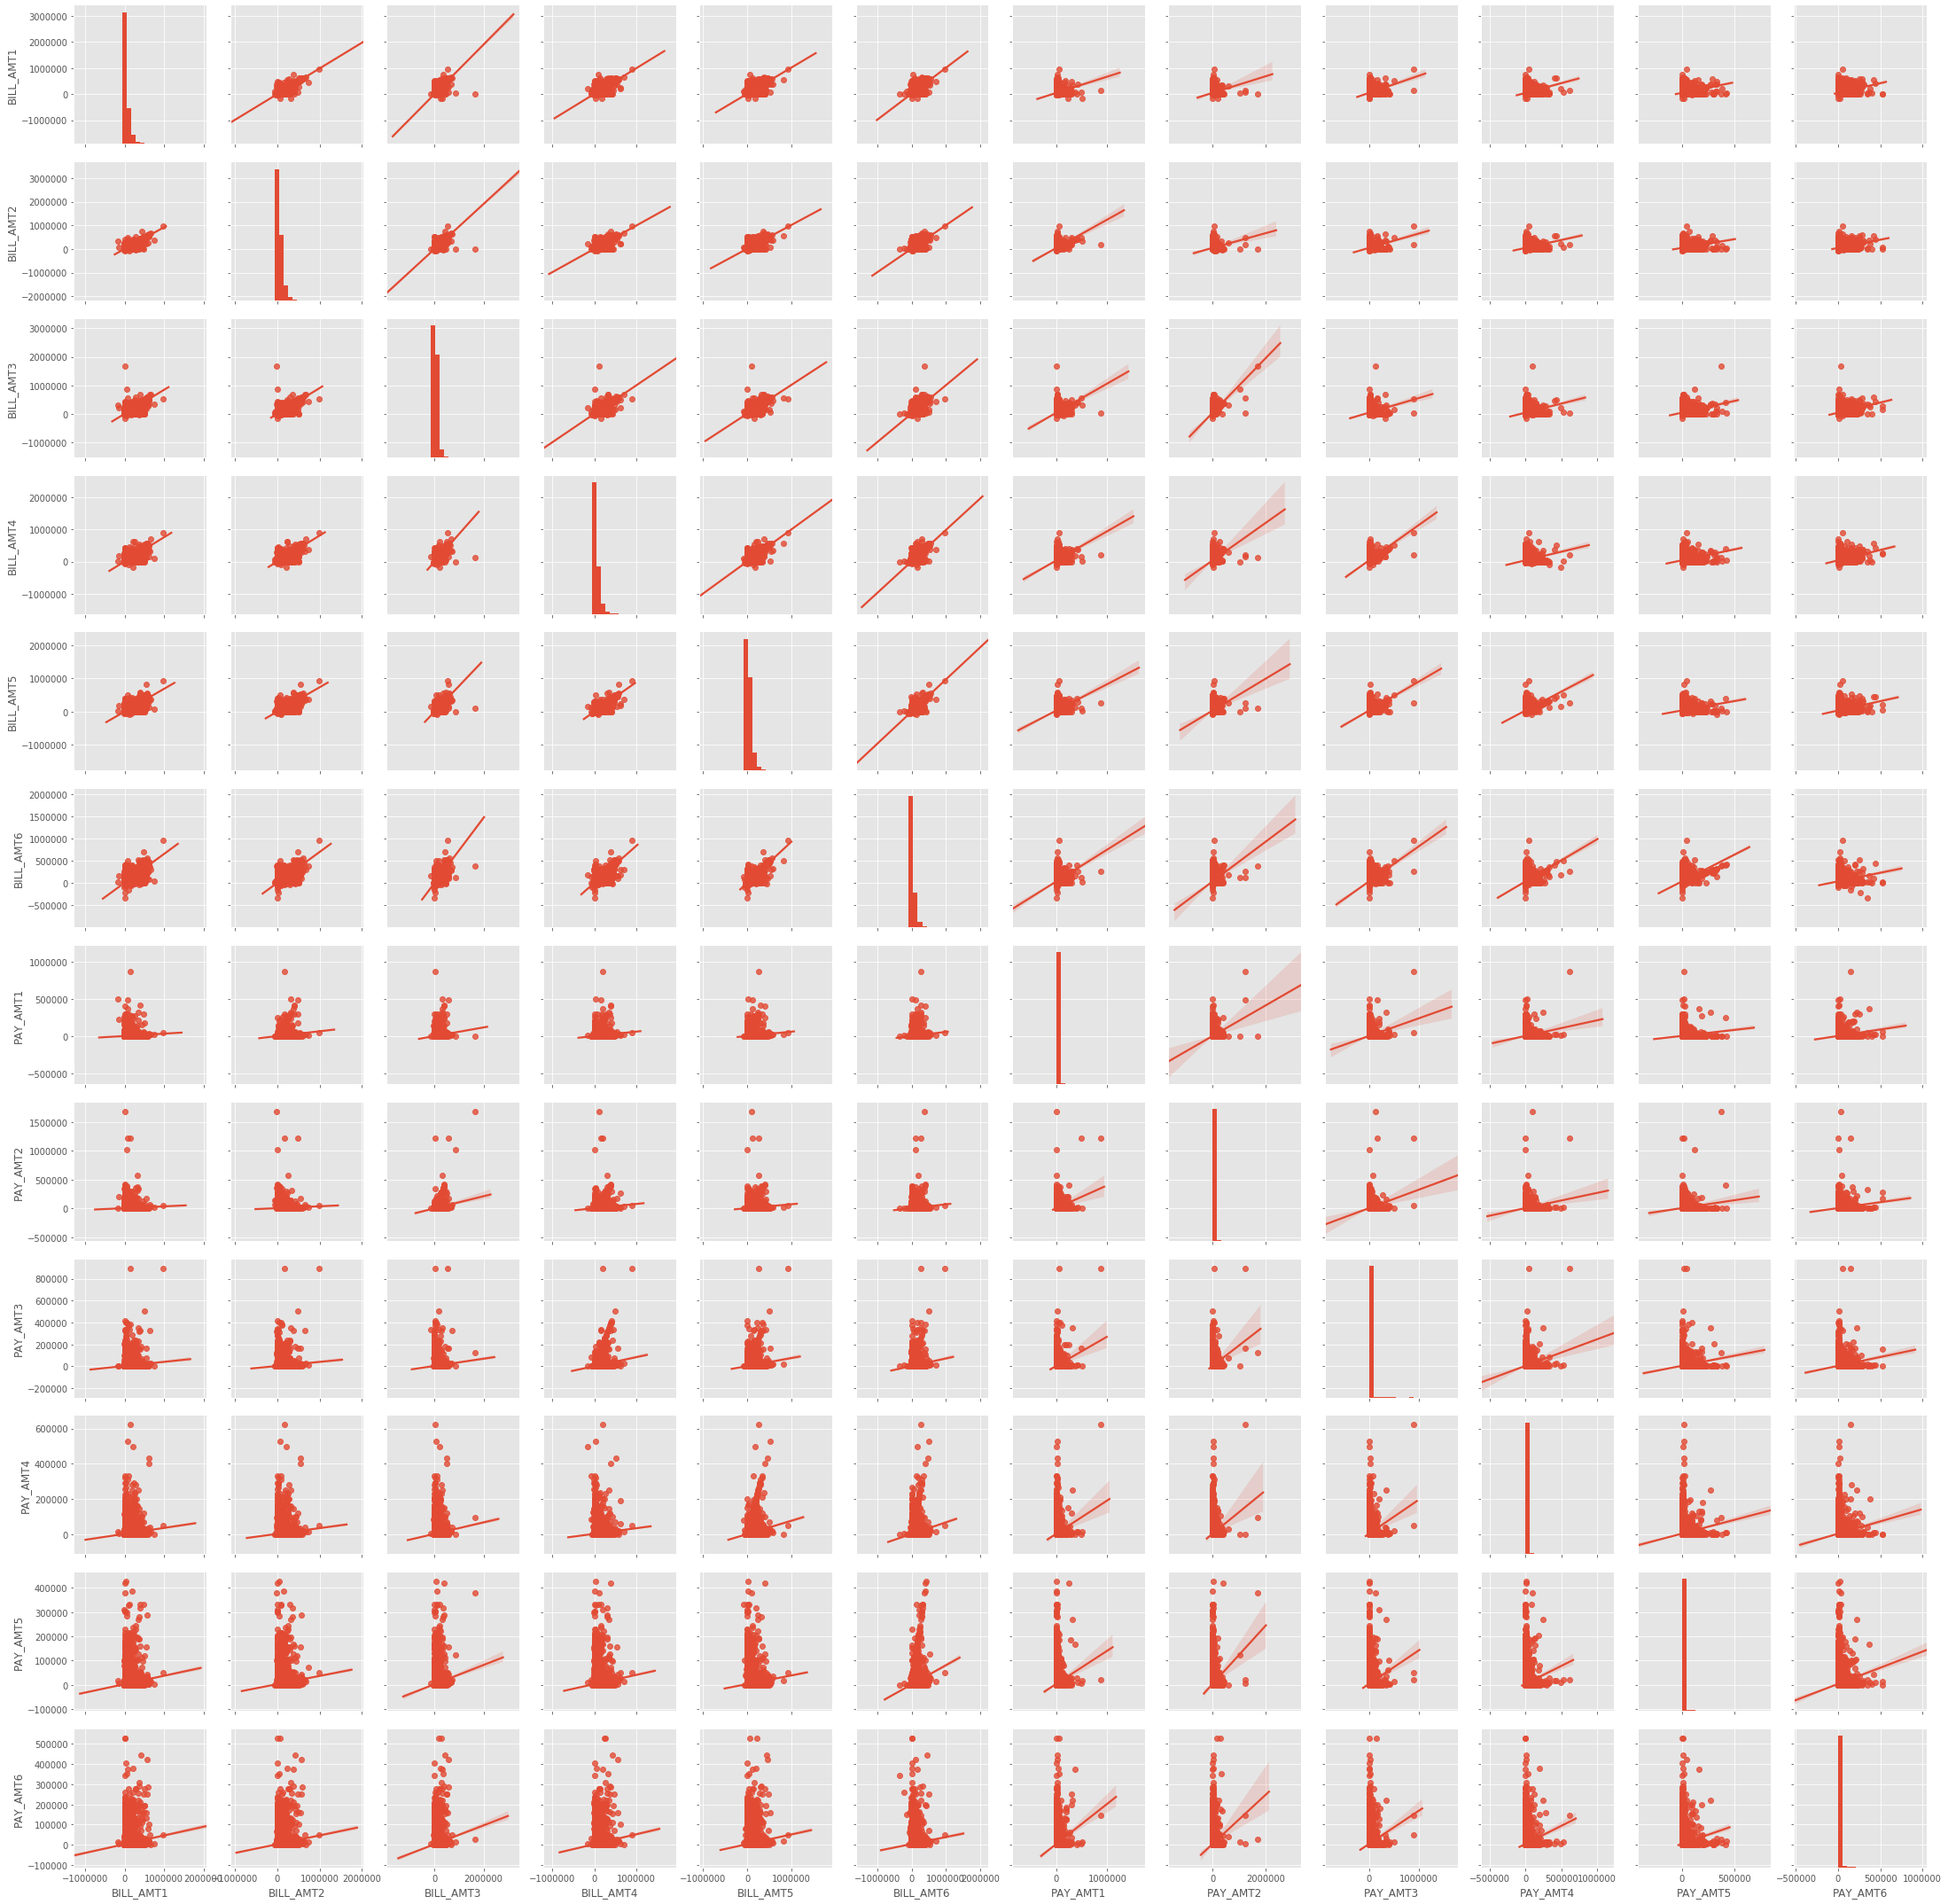

In [189]:
sns.pairplot(df_bill,kind='reg')

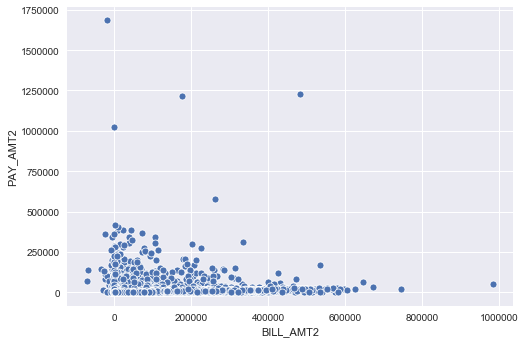

In [51]:
sns.scatterplot(df.BILL_AMT2,df.PAY_AMT2)

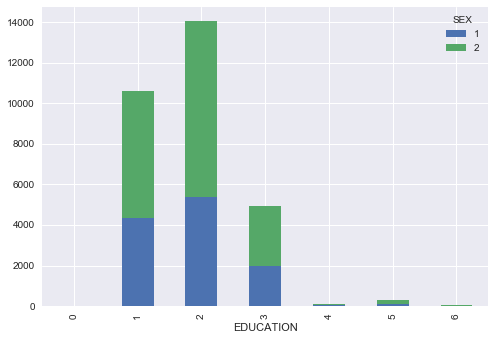

In [55]:
pd.crosstab(df.EDUCATION,df.SEX).plot(kind ='bar',stacked=True)

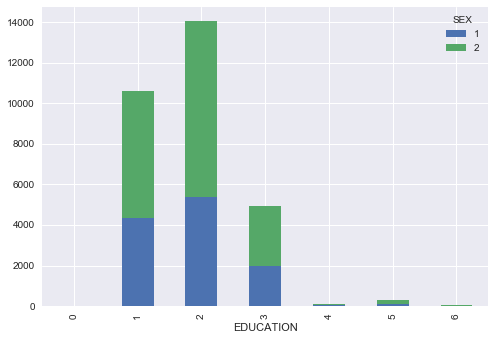

In [67]:
df.pivot_table(index='EDUCATION',columns='SEX',values='default',aggfunc='count').plot(kind='bar',stacked=True)

## Feature Engineering

1. bill payment average
2. 0,-2 values in pay_0,...
3. MArriage 0 value

In [157]:
df[df.MARRIAGE == 0].head()
#Solution: for Education 3, marriage will be 1 else 2

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default
219,219,110000,31,0,0,0,0,0,0,89989,...,4000,5000,3000,3000,3000,8954,2,3,0,0
810,810,160000,37,0,0,0,0,0,0,2694,...,35888,1325,891,1000,1098,426,2,2,0,0
821,821,200000,51,-1,-1,-1,-1,0,-1,780,...,0,390,780,0,390,390,2,3,0,0
1020,1020,180000,45,-1,-1,-2,-2,-2,-2,4148,...,0,0,0,0,0,0,2,3,0,0
1444,1444,200000,51,-1,-1,-1,-1,0,-1,3556,...,5020,9236,2529,0,4430,6398,1,3,0,0


In [68]:
df_un = df[df.MARRIAGE == 0]
l = np.where(df_un.EDUCATION==3,1,2)

In [71]:
df.MARRIAGE[df.MARRIAGE==0] = l

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
# all the features were highly correlated so, taking average and adding in the features
df['Bill_amount_avg'] = np.round(((df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/6),2)

In [76]:
cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for x in cols:
    df[x][(df[x] == -2) | (df[x] == -1)] = 0

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
df.drop('ID',1,inplace = True)

In [85]:
df = df.astype('int32')

In [153]:
df.MARRIAGE.value_counts()

2    15974
1    13703
3      323
Name: MARRIAGE, dtype: int64

## Statistical test to remove features

In [198]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [237]:
model = ols('default~LIMIT_BAL + AGE+PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6+Bill_amount_avg',data=df).fit()
x = sm.stats.anova_lm(model)

x.drop(['df', 'sum_sq', 'mean_sq', 'F'],1,inplace = True)

In [243]:
st = []
for g,h in x.iterrows():
    if(x.loc[g,'PR(>F)'] < 0.05):
        st.append((x.loc[g,'index'],x.loc[g,'PR(>F)']))
        #print(x.loc[g,'index'])

In [244]:
st

[('LIMIT_BAL', 8.892065893867423e-187),
 ('AGE', 3.064778140459095e-12),
 ('PAY_0', 0.0),
 ('PAY_2', 1.5144229099580364e-31),
 ('PAY_3', 9.06711491758731e-35),
 ('PAY_4', 4.680115833814352e-19),
 ('PAY_5', 3.7673794103196955e-16),
 ('PAY_6', 1.4839424868059217e-11),
 ('PAY_AMT1', 3.3546062507944118e-09),
 ('PAY_AMT2', 0.027734138505036744),
 ('Bill_amount_avg', 8.074134601260636e-05)]

## Modeling

In [259]:
X = df[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','Bill_amount_avg','SEX','EDUCATION','MARRIAGE']]
#X = df.drop('default',1)
y = df.default

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler

In [260]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =100,stratify = y)

In [170]:
scale = StandardScaler()

In [261]:
X_train = pd.DataFrame(scale.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scale.transform(X_test),columns = X_test.columns)

In [262]:
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,Bill_amount_avg,SEX,EDUCATION,MARRIAGE
0,0.24,-0.81,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,0.73,-0.19,-0.53,0.81,-1.07,0.87
1,-0.60,-0.38,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,-0.13,-0.08,0.50,0.81,0.19,-1.07
2,0.32,-0.38,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,0.16,0.16,1.79,0.81,0.19,-1.07
3,0.48,-0.38,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,0.93,0.32,1.48,0.81,-1.07,0.87
4,-0.91,-1.14,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,-0.19,-0.21,-0.39,0.81,0.19,-1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.29,1.03,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,0.25,-0.04,0.99,0.81,0.19,0.87
20996,-0.14,-0.16,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,0.51,0.11,-0.48,0.81,-1.07,-1.07
20997,1.01,-0.70,-0.47,-0.40,-0.38,-0.34,-0.31,-0.32,-0.10,-0.17,-0.54,-1.24,-1.07,0.87
20998,-1.06,-1.14,-0.47,2.08,-0.38,-0.34,-0.31,-0.32,-0.33,-0.18,-0.66,0.81,-1.07,0.87


## Logistic

In [263]:
logreg= LogisticRegression()

logreg.fit(X_train,y_train)

y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
y_train_prob = logreg.predict_proba(X_train)[:,1]
y_test_prob = logreg.predict_proba(X_test)[:,1]


In [264]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8206190476190476
AUC score of train model is 0.7580930439037779 

Accuracy of test model is 0.815
AUC score of test model is 0.7576419469005875 

Confusion matrix of test model is: 
 [[6705  304]
 [1361  630]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.67      0.32      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.81      0.79      9000



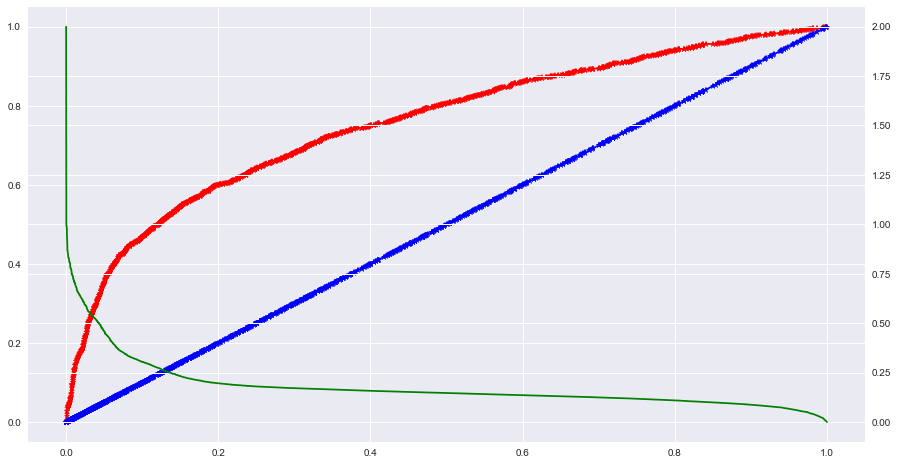

In [175]:
fpr,tpr,threshold = roc_curve(y_test,y_test_prob)

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(fpr,tpr,marker='*',label = 'logistic',color='r')
ax.plot(fpr,fpr,marker='*',label = 'worst',color='b')
ax1=ax.twinx()
ax1.plot(fpr,threshold,label='threshold',color='g')
plt.show()

In [105]:
# Not at all a good model, need to see feature engineering or other model

## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
rf = RandomForestClassifier(max_depth =4,n_estimators=300,random_state=100)

rf.fit(X_train,y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]
y_test_prob = rf.predict_proba(X_test)[:,1]


In [253]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8227619047619048
AUC score of train model is 0.7757583408226845 

Accuracy of test model is 0.8192222222222222
AUC score of test model is 0.7774857381830736 

Confusion matrix of test model is: 
 [[6681  328]
 [1299  692]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



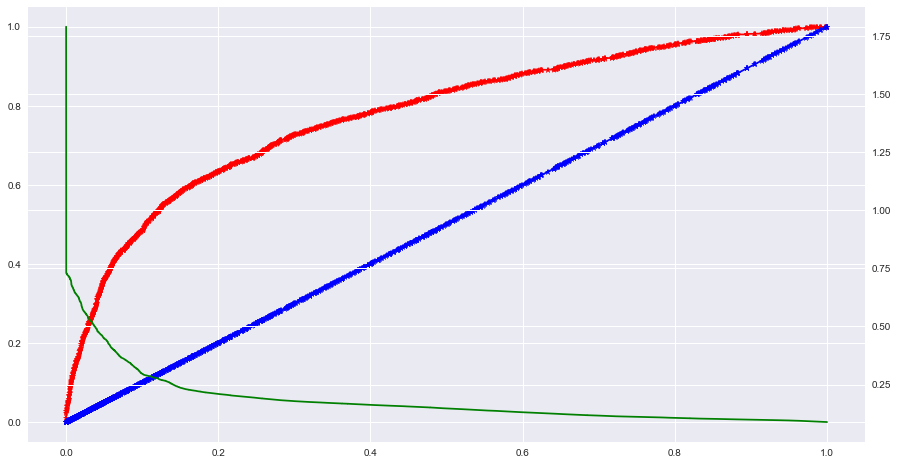

In [121]:
fpr,tpr,threshold = roc_curve(y_test,y_test_prob)

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(fpr,tpr,marker='*',label = 'logistic',color='r')
ax.plot(fpr,fpr,marker='*',label = 'worst',color='b')
ax1=ax.twinx()
ax1.plot(fpr,threshold,label='threshold',color='g')
plt.show()

In [ ]:
## slight better performance than logistic,still need to work

## Voting

In [123]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [254]:
dt = DecisionTreeClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
vote = [('Decision',dt),('logistic',logreg),('RandomForestClassifier',rf),('KNeighborsClassifier',knn)]
vc = VotingClassifier(estimators=vote,voting='soft')

In [255]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision', DecisionTreeClassifier()),
                             ('logistic', LogisticRegression()),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('KNeighborsClassifier', KNeighborsClassifier())],
                 voting='soft')

In [256]:
y_test_pred = vc.predict(X_test)
y_train_pred = vc.predict(X_train)
y_train_prob = vc.predict_proba(X_train)[:,1]
y_test_prob = vc.predict_proba(X_test)[:,1]


In [257]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.9772380952380952
AUC score of train model is 0.9995310454037322 

Accuracy of test model is 0.8036666666666666
AUC score of test model is 0.7387469608386834 

Confusion matrix of test model is: 
 [[6525  484]
 [1283  708]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.59      0.36      0.44      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000



## Gradient Boost

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
gbc =GradientBoostingClassifier(n_estimators=200,max_depth =5)

gbc.fit(X_train,y_train)

y_test_pred = gbc.predict(X_test)
y_train_pred = gbc.predict(X_train)
y_train_prob = gbc.predict_proba(X_train)[:,1]
y_test_prob = gbc.predict_proba(X_test)[:,1]


In [183]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8606190476190476
AUC score of train model is 0.9021986936114382 

Accuracy of test model is 0.8151111111111111
AUC score of test model is 0.7748501084098016 

Confusion matrix of test model is: 
 [[6628  381]
 [1283  708]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.65      0.36      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



## Light and cat boost

In [140]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [265]:
cbc = CatBoostClassifier(learning_rate=0.12, n_estimators=200, max_depth=4, subsample=0.8,
                           loss_function='MultiClass', bootstrap_type='Bernoulli')

In [266]:
cbc.fit(X_train,y_train)

y_test_pred = cbc.predict(X_test)
y_train_pred = cbc.predict(X_train)
y_train_prob = cbc.predict_proba(X_train)[:,1]
y_test_prob = cbc.predict_proba(X_test)[:,1]


0:	learn: 0.6433711	total: 9.22ms	remaining: 1.83s
1:	learn: 0.6044088	total: 17.2ms	remaining: 1.7s
2:	learn: 0.5727168	total: 23ms	remaining: 1.51s
3:	learn: 0.5487797	total: 27.7ms	remaining: 1.36s
4:	learn: 0.5285945	total: 39.7ms	remaining: 1.55s
5:	learn: 0.5119474	total: 54.5ms	remaining: 1.76s
6:	learn: 0.4988658	total: 69.1ms	remaining: 1.9s
7:	learn: 0.4876176	total: 85.4ms	remaining: 2.05s
8:	learn: 0.4783703	total: 98.9ms	remaining: 2.1s
9:	learn: 0.4708130	total: 107ms	remaining: 2.03s
10:	learn: 0.4651605	total: 124ms	remaining: 2.13s
11:	learn: 0.4593888	total: 128ms	remaining: 2s
12:	learn: 0.4552119	total: 132ms	remaining: 1.9s
13:	learn: 0.4515252	total: 136ms	remaining: 1.81s
14:	learn: 0.4484398	total: 149ms	remaining: 1.83s
15:	learn: 0.4458601	total: 157ms	remaining: 1.8s
16:	learn: 0.4436517	total: 162ms	remaining: 1.75s
17:	learn: 0.4421850	total: 167ms	remaining: 1.69s
18:	learn: 0.4405056	total: 172ms	remaining: 1.64s
19:	learn: 0.4392023	total: 176ms	remainin

179:	learn: 0.4135580	total: 1.41s	remaining: 157ms
180:	learn: 0.4135558	total: 1.42s	remaining: 149ms
181:	learn: 0.4135206	total: 1.44s	remaining: 142ms
182:	learn: 0.4134366	total: 1.44s	remaining: 134ms
183:	learn: 0.4133261	total: 1.45s	remaining: 126ms
184:	learn: 0.4132906	total: 1.46s	remaining: 118ms
185:	learn: 0.4131865	total: 1.48s	remaining: 111ms
186:	learn: 0.4131288	total: 1.49s	remaining: 104ms
187:	learn: 0.4131267	total: 1.5s	remaining: 95.5ms
188:	learn: 0.4130413	total: 1.5s	remaining: 87.3ms
189:	learn: 0.4129218	total: 1.51s	remaining: 79.3ms
190:	learn: 0.4128886	total: 1.52s	remaining: 71.9ms
191:	learn: 0.4128181	total: 1.53s	remaining: 63.9ms
192:	learn: 0.4127371	total: 1.54s	remaining: 56ms
193:	learn: 0.4127004	total: 1.55s	remaining: 47.9ms
194:	learn: 0.4126482	total: 1.56s	remaining: 40ms
195:	learn: 0.4125867	total: 1.58s	remaining: 32.2ms
196:	learn: 0.4124945	total: 1.58s	remaining: 24.1ms
197:	learn: 0.4124302	total: 1.59s	remaining: 16.1ms
198:	le

In [267]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8298095238095238
AUC score of train model is 0.8000024483679029 

Accuracy of test model is 0.8168888888888889
AUC score of test model is 0.7838901465497579 

Confusion matrix of test model is: 
 [[6652  357]
 [1291  700]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [187]:
lgbm = LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422)

In [188]:
lgbm.fit(X_train,y_train)

y_test_pred = lgbm.predict(X_test)
y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]
y_test_prob = lgbm.predict_proba(X_test)[:,1]


In [189]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8393809523809523
AUC score of train model is 0.8630516668153019 

Accuracy of test model is 0.8203333333333334
AUC score of test model is 0.7823420544397284 

Confusion matrix of test model is: 
 [[6672  337]
 [1280  711]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



## XGBOOST

In [147]:
from xgboost import XGBClassifier

In [190]:
xgb = XGBClassifier()

In [191]:
xgb.fit(X_train,y_train)

y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)
y_train_prob = xgb.predict_proba(X_train)[:,1]
y_test_prob = xgb.predict_proba(X_test)[:,1]


In [192]:
print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8940476190476191
AUC score of train model is 0.9507534687680069 

Accuracy of test model is 0.8131111111111111
AUC score of test model is 0.7542711641679898 

Confusion matrix of test model is: 
 [[6613  396]
 [1286  705]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.35      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [154]:
from sklearn.dummy import DummyClassifier

In [156]:
dum = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)

In [158]:
y_pred = dum.predict(X_test)
y_dummy_prob = dum.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_dummy_prob)

In [161]:
dum.score(X_test,y_test)

0.7787777777777778

In [163]:
from sklearn.svm import SVC


In [193]:
svc = SVC(degree=4,C=0.1,probability=True)

svc.fit(X_train,y_train)

SVC(C=0.1, degree=4, probability=True)

In [194]:
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
y_train_prob = svc.predict_proba(X_train)[:,1]
y_test_prob = svc.predict_proba(X_test)[:,1]


print(f'Accuracy of train model is {accuracy_score(y_train,y_train_pred)}')
print(f'AUC score of train model is {roc_auc_score(y_train,y_train_prob)} \n')
print(f'Accuracy of test model is {accuracy_score(y_test,y_test_pred)}')
print(f'AUC score of test model is {roc_auc_score(y_test,y_test_prob)} \n')
print(f'Confusion matrix of test model is: \n {confusion_matrix(y_test,y_test_pred)}\n')
print(f'Classification report of test model is: \n {classification_report(y_test,y_test_pred)}')

Accuracy of train model is 0.8193809523809524
AUC score of train model is 0.7615634671917055 

Accuracy of test model is 0.8146666666666667
AUC score of test model is 0.7203863741523688 

Confusion matrix of test model is: 
 [[6730  279]
 [1389  602]]

Classification report of test model is: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.68      0.30      0.42      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.63      0.65      9000
weighted avg       0.80      0.81      0.79      9000

